In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
covidData = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

# Viewing the Dataset

In [3]:
#Looking at the first 10 and last 10 rows to get a snapshot of what the dataset looks like
pd.concat([covidData.head(10),covidData.tail(10)])

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01
5,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22
6,30/11/2020,2020-48,1073,68,Afghanistan,AF,AFG,38041757.0,Asia,6.42
7,23/11/2020,2020-47,1368,69,Afghanistan,AF,AFG,38041757.0,Asia,6.66
8,16/11/2020,2020-46,1164,61,Afghanistan,AF,AFG,38041757.0,Asia,4.65
9,09/11/2020,2020-45,606,24,Afghanistan,AF,AFG,38041757.0,Asia,3.70


In [4]:
#Get a snapshot of the number of rows and columns that exist in the data set
covidData.shape

(9791, 10)

# Preparing the Data

In [5]:
#We want to see what the total number of null values exist within our dataset
covidData.isnull().sum()

dateRep                                              0
year_week                                            0
cases_weekly                                         0
deaths_weekly                                        0
countriesAndTerritories                              0
geoId                                               44
countryterritoryCode                                22
popData2019                                         22
continentExp                                         0
notification_rate_per_100000_population_14-days    235
dtype: int64

In [6]:
#Going to remove the rows that contain N/A values in the dataset
covidData.dropna(inplace=True)

In [7]:
#Get a look at the new number of rows. Meaning there were 278 rows that had a N/A somewhere in the columns
covidData.shape

(9513, 10)

# Exploring the Data

In [8]:
#We can see what sort of data types each column is. We have no null values because we dropped those rows already
covidData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9513 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   dateRep                                          9513 non-null   object 
 1   year_week                                        9513 non-null   object 
 2   cases_weekly                                     9513 non-null   int64  
 3   deaths_weekly                                    9513 non-null   int64  
 4   countriesAndTerritories                          9513 non-null   object 
 5   geoId                                            9513 non-null   object 
 6   countryterritoryCode                             9513 non-null   object 
 7   popData2019                                      9513 non-null   float64
 8   continentExp                                     9513 non-null   object 
 9   notification_rate_per_100000_p

In [9]:
#We can look at the basic statistics of each of the columns to get a good idea of how the numbers are in each column
covidData.describe()

,cases_weekly,deaths_weekly,popData2019,notification_rate_per_100000_population_14-days
count,9.513000e+03,9513.000000,9.513000e+03,9513.000000
mean,9.436698e+03,203.956796,4.070112e+07,77.969015
std,5.640675e+04,939.511802,1.520623e+08,189.652189
min,-3.864000e+03,-875.000000,8.150000e+02,-132.600000
25%,1.000000e+01,0.000000,1.293120e+06,0.810000
50%,1.900000e+02,2.000000,7.813207e+06,7.660000
75%,2.523000e+03,40.000000,2.851583e+07,61.950000
max,1.782792e+06,22852.000000,1.433784e+09,4343.440000


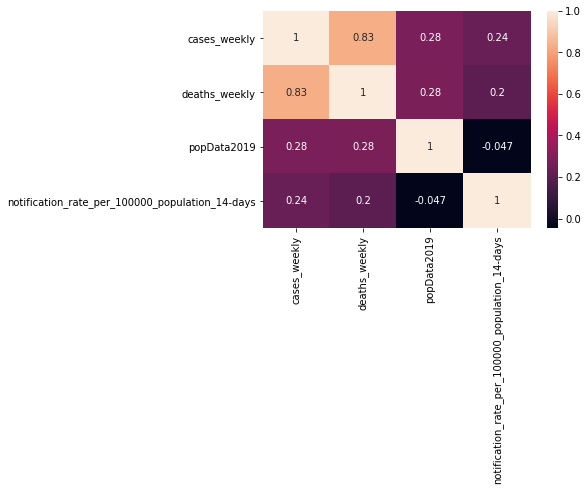

In [10]:
#A correlation heatmap to see how strong each numeric column correlates with another
sns.heatmap(covidData.corr(),annot=True)

# Tracking the Disease

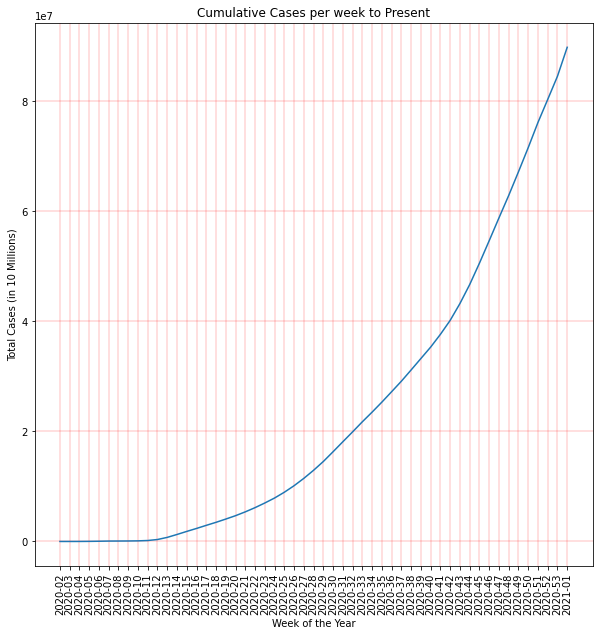

In [11]:
#We want to see how COVID has spread therefore we generate chart and see the rise of cumulative cases from beginning of 
#2020 to present
covidDatarev = covidData.iloc[::-1]
df_agg = covidDatarev.groupby(['year_week']).agg({'cases_weekly':sum})
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(df_agg.index, df_agg['cases_weekly'].cumsum())
plt.xlabel('Week of the Year')
plt.ylabel('Total Cases (in 10 Millions)')
plt.title('Cumulative Cases per week to Present')
plt.grid(color='r', linestyle='-', linewidth=0.25)
fig.set_size_inches([10,10])

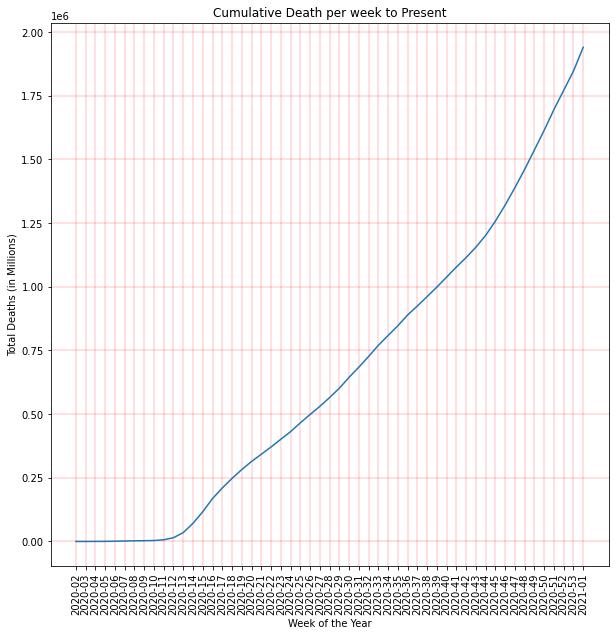

In [12]:
#Perform the same graph but with Deaths 
covidDatarev = covidData.iloc[::-1]
df_agg = covidDatarev.groupby(['year_week']).agg({'deaths_weekly':sum})
fig, ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(df_agg.index, df_agg['deaths_weekly'].cumsum())
plt.xlabel('Week of the Year')
plt.ylabel('Total Deaths (in Millions)')
plt.title('Cumulative Death per week to Present')
plt.grid(color='r', linestyle='-', linewidth=0.25)
fig.set_size_inches([10,10])

Text(0.5, 1.0, 'Total Cases by Continent')

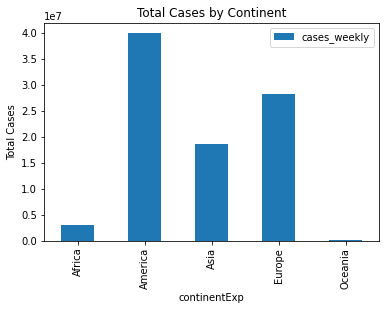

In [13]:
#We can see how each continent has been doing in terms of cases. America seems to be spreading the fastest
continentdf= covidData.groupby(['continentExp']).agg({'cases_weekly':sum})
continentdf.plot(kind='bar')
plt.ylabel('Total Cases')
plt.title('Total Cases by Continent')

In [14]:
#We want to see the infection rate for the week so we got the cases and divided by its population and multiplied by 
# 1 Million to get number of people per million infected for that week
covidData['infectionRatePerWeekPerMillion'] = (covidData['cases_weekly'] / covidData['popData2019']) * 1000000

In [15]:
covidData

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days,infectionRatePerWeekPerMillion
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15,17.743660
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61,23.710787
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19,52.416086
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56,19.452309
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01,46.186090
...,...,...,...,...,...,...,...,...,...,...,...
9785,27/04/2020,2020-17,6,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.12,0.409683
9786,20/04/2020,2020-16,11,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.11,0.751085
9787,13/04/2020,2020-15,5,2,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05,0.341402
9788,06/04/2020,2020-14,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05,0.136561


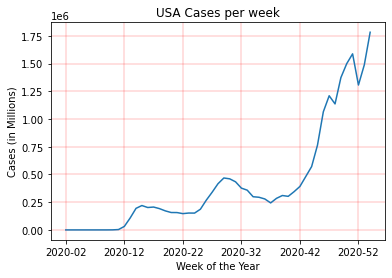

In [37]:
#We want to focus on US so we got the cases for US alone for each week and see where it sped up and slowed down
usaDF = covidData[covidData['countryterritoryCode']=='USA'].set_index('year_week')
usaDF=usaDF.iloc[::-1]
usaDF['cases_weekly'].plot()
plt.xlabel('Week of the Year')
plt.ylabel('Cases (in Millions)')
plt.title('USA Cases per week')
plt.grid(color='r', linestyle='-', linewidth=0.25)
fig.set_size_inches([10,10])

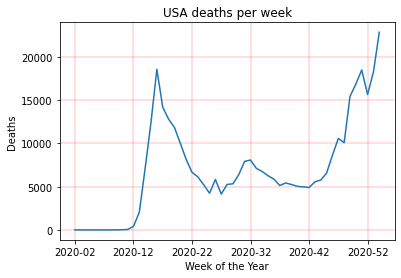

In [40]:
#Perform the same graph but analyze the deaths
usaDF['deaths_weekly'].plot()
plt.xlabel('Week of the Year')
plt.ylabel('Deaths')
plt.title('USA deaths per week')
plt.grid(color='r', linestyle='-', linewidth=0.25)
fig.set_size_inches([10,10])

# Scaling the 'deaths_weekly' variable

In [16]:
X = pd.DataFrame(covidData['deaths_weekly'])

/Users/deemalpatel/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[[71]
 [60]
 [88]
 ...
 [ 2]
 [ 0]
 [ 1]]


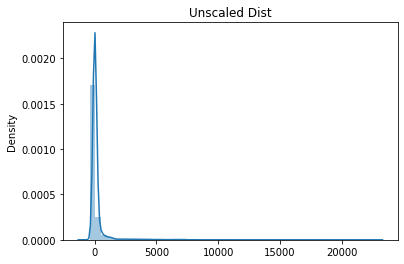

In [26]:
sns.distplot(X).set_title('Unscaled Dist')
print(X.values.reshape(-1,1))

/Users/deemalpatel/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[[-0.14152434]
 [-0.15323316]
 [-0.12342888]
 ...
 [-0.2149706 ]
 [-0.21709947]
 [-0.21603503]]


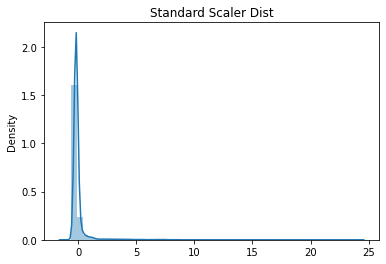

In [27]:
sns.distplot(StandardScaler().fit_transform(X.values.reshape(-1,1))).set_title('Standard Scaler Dist')
print(StandardScaler().fit_transform(X.values.reshape(-1,1)))

/Users/deemalpatel/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[[0.03987019]
 [0.03940658]
 [0.04058667]
 ...
 [0.03696211]
 [0.03687782]
 [0.03691996]]


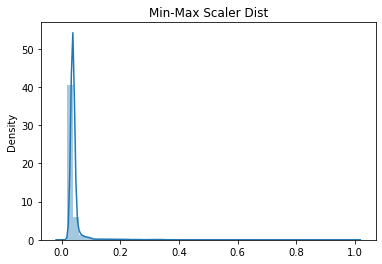

In [19]:
sns.distplot(MinMaxScaler().fit_transform(X.values.reshape(-1,1))).set_title('Min-Max Scaler Dist')
print(MinMaxScaler().fit_transform(X.values.reshape(-1,1)))